# DATA CLEANING

In [3]:
import pandas as pd
import seaborn as sns

df = pd.read_csv(r"C:\Users\Rann\Desktop\Data Analysis\Projects\Kaggle Datasets Projects\Project - Netflix TV Shows and Movies (May 2022) (Python)\Original File\Best Movies Netflix.csv")

# COUNT DUPLICATE IN A DATAFRAME 
df.duplicated().sum()

0

In [284]:
# COUNT DUPLICATE ON CERTAIN COLUMNS 

df.duplicated(subset = ["index","TITLE","RELEASE_YEAR","SCORE","NUMBER_OF_VOTES","DURATION","MAIN_GENRE","MAIN_PRODUCTION"]).sum()

0

In [8]:
# CHECK TOTAL EMPTY DATA 

df.isnull().sum().sum()

0

In [9]:
# DELETE INDEX COLUMN 

df = df.drop(["index"], axis = 1)

# CORRELATION MATRIX

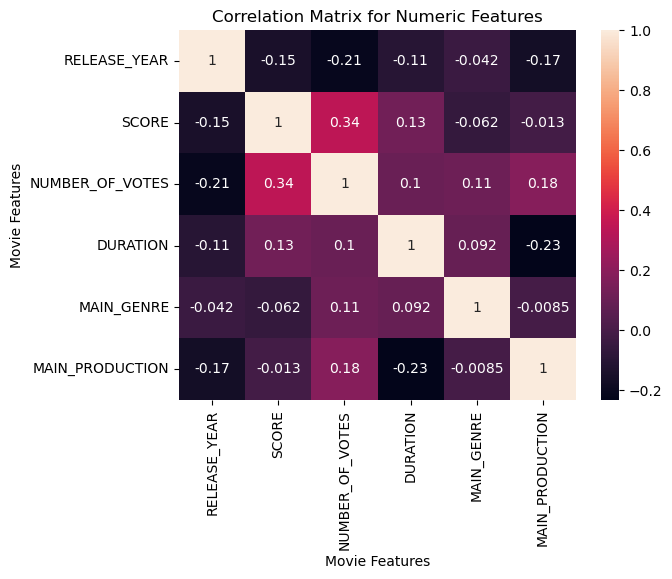

In [10]:
import matplotlib
import matplotlib.pyplot as plt

# NUMERIZED OTHER COLUMNS 

df_numerized = df.drop(["TITLE"], axis = 1)                                   # exclude title column

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtypes == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes             # function is to give random numeric numbers    

# PLOT CORRELATION MATRIX

correlation_matrix = df_numerized.corr(method = "pearson")
sns.heatmap(correlation_matrix, annot = True)                                 # annot - write the data value in each cell

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

# SCATTER PLOT

[Text(0.5, 0, 'NUMBER OF VOTES'), Text(0.5, 1.0, 'Number Of Votes vs Score')]

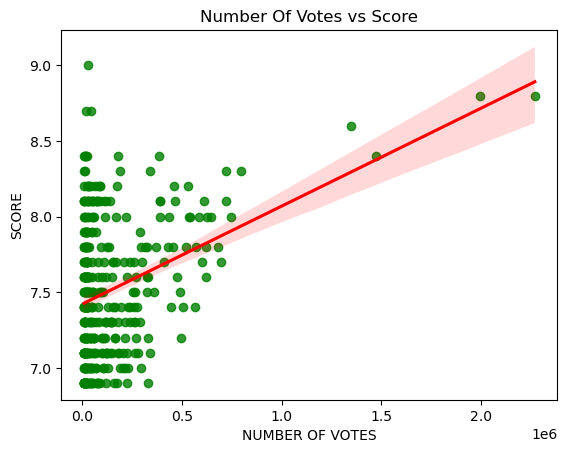

In [11]:
# PLOT SCATTER PLOT

ax = sns.regplot(x = df["NUMBER_OF_VOTES"], y = df["SCORE"], scatter_kws = {"color" : "green"}, line_kws = {"color" : "red"})

ax.set(xlabel = "NUMBER OF VOTES", title = "Number Of Votes vs Score")

Conclusion from above 2 plots:

1. The above plots showed that the movie's IMDB score and number of votes obtained for that movie are directly proportional to each other

# BARPLOT

[Text(0, 0.5, 'MOVIE GENRE')]

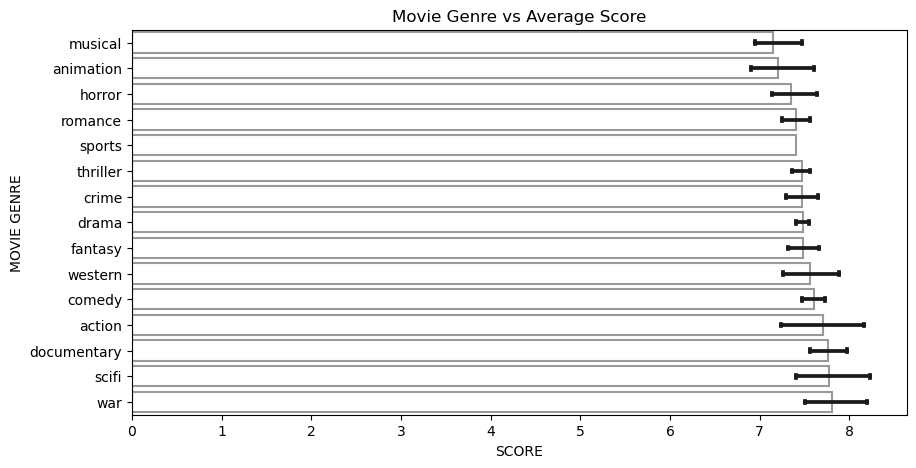

In [12]:
# PLOT BARPLOT

plt.figure(figsize=(10,5))

# CALCULATE MEAN SCORE VALUES GROUP BY MAIN_GENRE. AFTER THAT, SORT BY THE MEAN SCORE 
df_agg = df.groupby(["MAIN_GENRE"])["SCORE"].mean().reset_index().sort_values(["SCORE"], ascending = True)

p = sns.barplot(data = df,  
            x = "SCORE", 
            y = "MAIN_GENRE",
            order = df_agg["MAIN_GENRE"],       # Sort Bars in Barplot Created from Aggregated Data
            capsize = .1,                       # width of the cap size at the end of the line
            errcolor = ".1",                    # colour of the line
            linewidth = 1.5,                    # width of the bar plot line
            edgecolor = ".6",                   # colour of the bar plot
            facecolor = (0, 0, 0, 0))

plt.title("Movie Genre vs Average Score")
p.set(ylabel = "MOVIE GENRE")

[Text(0, 0.5, 'MOVIE GENRE')]

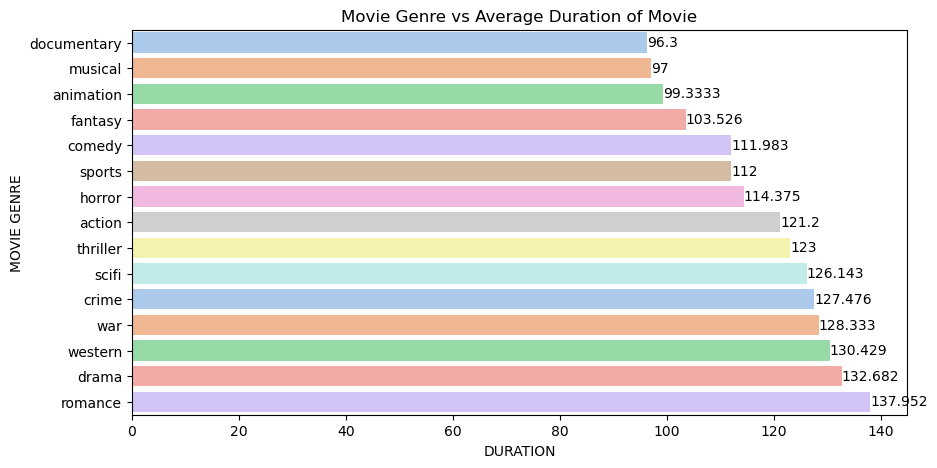

In [13]:
plt.figure(figsize=(10,5))

# CALCULATE MEAN DURATION VALUES GROUP BY MAIN_GENRE. AFTER THAT, SORT BY DURATION
df_agg = df.groupby(["MAIN_GENRE"])["DURATION"].mean().reset_index().sort_values(["DURATION"], ascending = True)

p = sns.barplot(data = df,  
            x = "DURATION", 
            y = "MAIN_GENRE",
            order = df_agg["MAIN_GENRE"],       # Sort Bars in Barplot Created from Aggregated Data    
            ci = None,                          # No error bars
            errcolor = ".3",                    # colour of the line
            linewidth = 2,                      # width of the bar plot line
            palette = "pastel")

p.bar_label(p.containers[0])                    # label data

p.set(title = "Movie Genre vs Average Duration of Movie")
p.set(ylabel = "MOVIE GENRE")

<AxesSubplot:title={'center':"YEARLY NUMBER OF MOVIE'S RELEASE"}, xlabel='RELEASE_YEAR', ylabel='RELEASE_YEAR'>

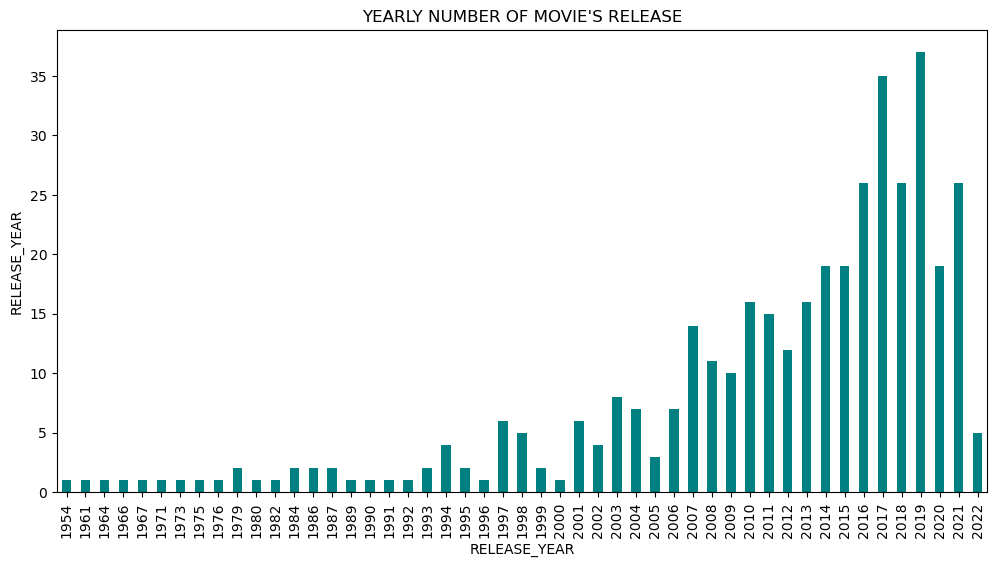

In [56]:
plt.figure(figsize=(12,6))

df2 = df.groupby(["RELEASE_YEAR"])["RELEASE_YEAR"].count()
df2.plot(kind = "bar", 
         title = "YEARLY NUMBER OF MOVIE'S RELEASE",
         xlabel = "RELEASE_YEAR", 
         ylabel = "RELEASE_YEAR",
         color = "teal")

Conclusion from 1st and 2nd bar charts:

1. War, Scifi and Documentary genres have the highest movie score.
2. Genres like Musical, Animation and Horror have a very low average score.
3. Romance, Drama and Western genres movies have the longest duration on an average.
4. Documentary, Musical and Animation have the least duration time.

Conclusion from 3rd bar chart:

1. Total number of movies released by Netflix increases drastically in Year 2000's but observed a major drop in Year 2022 likely    due to Covid19 pandemic.

# LINE PLOT

Text(0.5, 0, 'RELEASE YEAR')

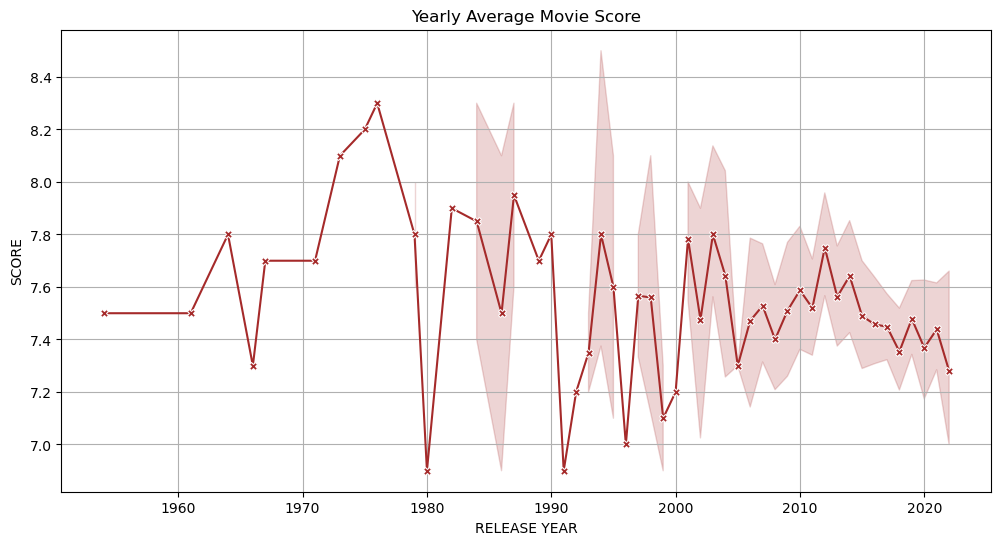

In [14]:
# PLOT LINEPLOT

plt.figure(figsize=(12,6))

p = sns.lineplot(data = df,  
             x = "RELEASE_YEAR", 
             y = "SCORE",
             color = "brown",
             marker = "X")

plt.grid()
plt.title("Yearly Average Movie Score")
plt.xlabel("RELEASE YEAR")

Text(0.5, 0, 'RELEASE YEAR')

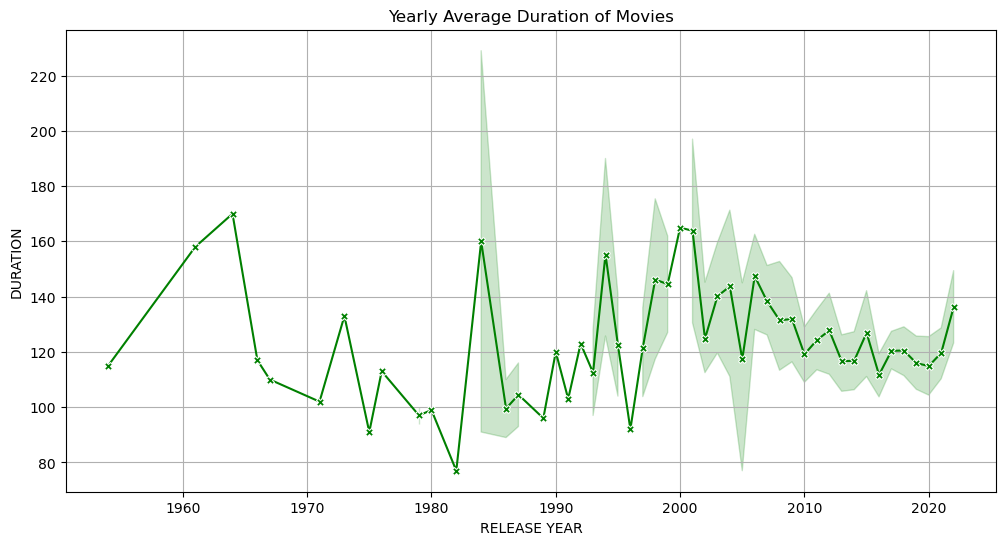

In [15]:
plt.figure(figsize=(12,6))

sns.lineplot(data = df,  
             x = "RELEASE_YEAR", 
             y = "DURATION",
             color = "green",
             marker = "X") 

plt.grid()
plt.title("Yearly Average Duration of Movies")
plt.xlabel("RELEASE YEAR")

Conclusion from the above 2 lineplots:

1. Movies that were released between 1970 and 1980 had the best average score.
2. Movies between 1980 and 1990 had better average score than the movies released between 1990 and 2000.
3. Movies that were released at year 1980 and 1991 had the worst average score.
4. Movies released after 2000 had a consistent score above 7.2.
5. Early in the 1960's, the duration of movies were much higher which was gradually reduced by the year 1980 and thats where the average score was the lowest.
6. Generally, most of the movies made after 1996 had a duration time of more than 120 minutes.

# PIE CHART

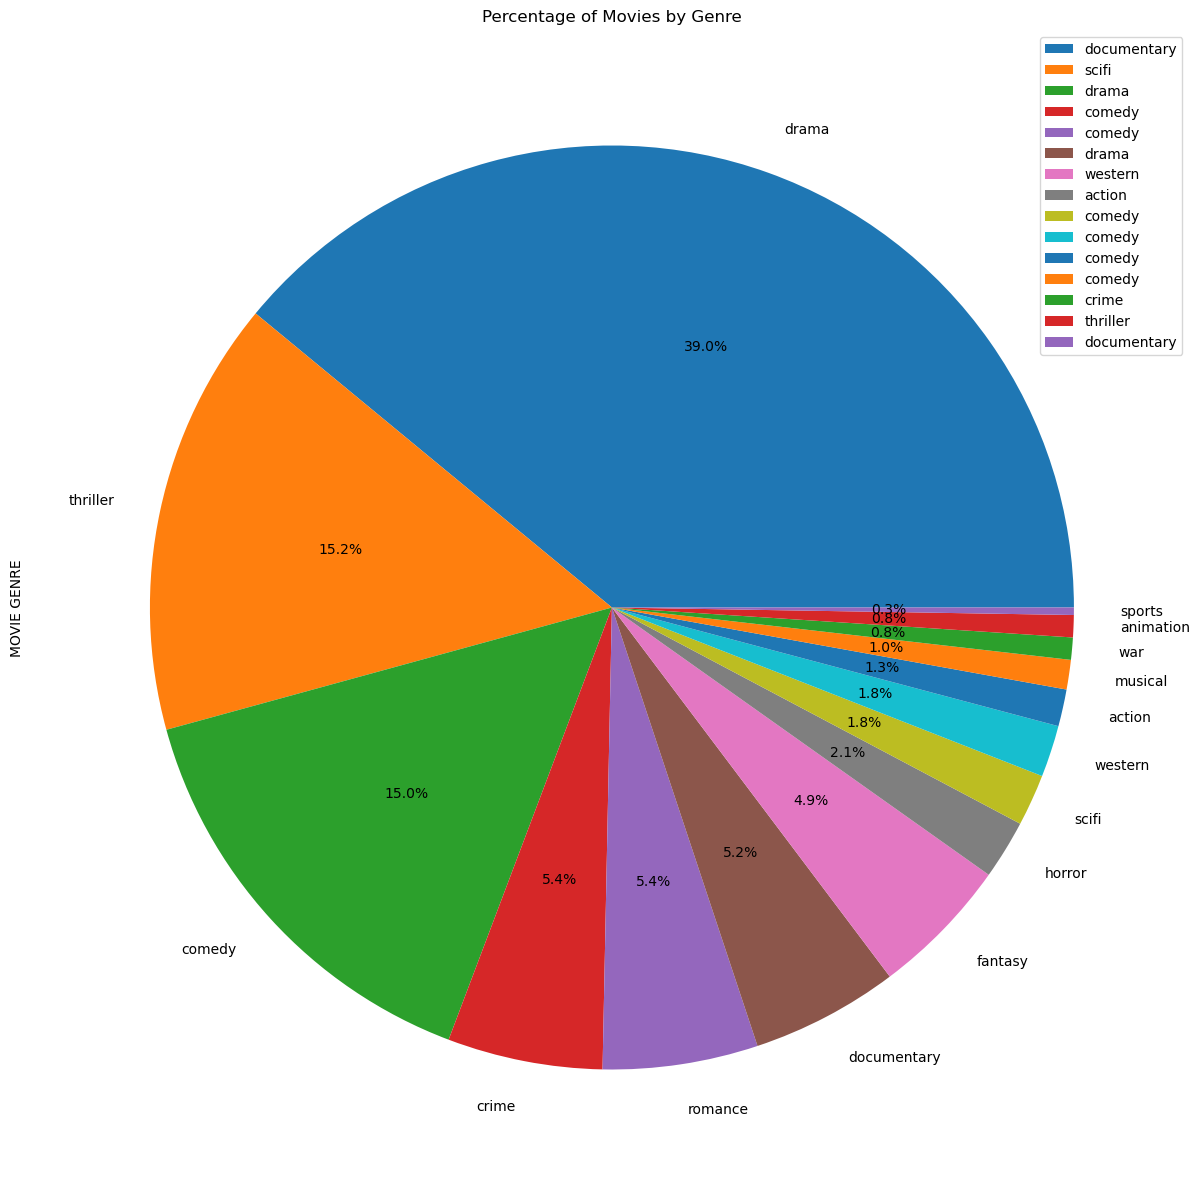

In [16]:
#PLOT PIE CHART

plt.figure(figsize=(22,15))

df['MAIN_GENRE'].value_counts().plot(kind="pie",startangle = 0, autopct='%1.1f%%')

plt.title("Percentage of Movies by Genre")
plt.ylabel("MOVIE GENRE")
plt.legend(df['MAIN_GENRE'], loc = "upper right")

Conclusion from above piechart:

1. Piechart shows that genres such as Drama, Thiller and Comedy are the highest in the list.
2. Genres such as Sports, Animation and War are the least in the list.